# Final Project from "Artificial Intelligence" - Romario Stankovic 2020230210

## Instructions:

Select a classification dataset, some of the sources you can use are the following:

- https://datasetsearch.research.google.com/
- https://www.kaggle.com/
- https://archive.ics.uci.edu/ml/index.php
- https://datahub.io/
- https://github.com/mwaskom/seaborn-data


Every students needs to use different dataset, so after selecting the dataset send it to the teaching assistant for approval.

Do exploratory data analysis (EDA) for the selected dataset, to develop an understanding of it. Use any of the classification model you learnt during the AI course. Present the performance of the model. Try to change some of the parameters in order to improve the results. Keep in the code all the versions of your model and results of all modes.

Note: the link (the source) of the dataset should be in your python notebook as well. If you are importing your dataset from a *.csv file, please provide the dataset along with the code.

## Dataset:

The dataset used for this project is the "Pumpkin Seeds Dataset". This dataset contains 12 features and 1 target variable. The target variable is the "Class" which is either "Cercevelik" or "Urgup Sivrisi".
The Features of the dataset are:

- Area - The area of the seed: **A = R1 * R2 * pi**
- Perimeter - The perimeter of the seed: **P = 2 * pi * sqrt( (R1^2 + R2^2) / 2 )**
- Major_Axis_Length - The length of the major axis of the seed: **D1 = R1*2**
- Minor_Axis_Length - The length of the minor axis of the seed: **D2 = R2*2**
- Convex_Area - The area of the convex hull of the seed
- Equiv_Diameter - The diameter of the circle with the same area as the seed **De = sqrt(4*A/pi)**
- Eccentricity - The eccentricity of the seed: **E = sqrt(1 - (D2^2/D1^2))**
- Solidity - The ratio of the seed area to its convex area **S = A / Ac**
- Extent - The ratio of the seed area to the bounding box area **Ex = A / (D1 * D2)**
- Roundness - The ratio of the seed area to the area of the circle with the same perimeter as the seed **R = (4 * pi * A) / (P^2)**
- Aspect_Ratio - The ratio of the seed's major axis length to its minor axis length **Ar = D1/D2**
- Compactness - The compactness of the seed

*Note: The formulas above can be used to calculate the features of the seeds, but do not yield the same values due to the natural shape of seeds not being perfect ellipses*

This dataset can be found on the following link: [Pumpkin Seeds Dataset](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset)

## Exploratory Data Analysis (EDA):

### Loading the dataset:

Before we start with Exploratory Data Analysis, we need to load the dataset. The dataset is loaded from a .csv file which was generated from the original .xlsx file. The original file can be found on the link provided above. There are no fundamental changes made to the dataset except for the file format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read the data from the CSV file
data = pd.read_csv('Pumpkin_Seeds_Dataset.csv')

### Analyzing the dataset:

The next step wll be general analysis of the dataset. We will check the shape of the dataset, show the first 10 samples, show number of missing and unique values as well as display a statistical summary of the dataset. After that we will generate a correlation matrix to view the correlation between the features, a box plot to check for outliers, a histogram to view the distribution of values and a pie chart to check the distribution of the target variable.

#### Shape

The shape represents the number of features (rows) and samples (columns) in the dataset. A larger number of features and samples will result in a more accurate model. However, more features and samples will also result in a longer training time.

In [3]:
# Print number of rows (samples) and columns (features)
print(f'Rows: {data.shape[0]}, Columns: {data.shape[1]}')

Rows: 2500, Columns: 13


#### Column names

We should know the column names of the dataset. This will help us determine which features we will use for training and which features we will use as target variables.

In [4]:
# Print the column names
print(f'Columns: {[name for name in data.columns]}')

Columns: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness', 'Class']


#### Column data types

Knowing the data types of the features is important because it will help us see which features are categorical and which are numerical. Categorical features will need to be encoded before they can be used for training while numerical features can be used as is.

In [5]:
data.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

#### Printing the first 10 samples

Visualizing a couple of samples from the dataset will help us get a better understanding of the data. We can see the values of the features and the target variable for each sample. This will help us determine which features are important and which are not.

In [6]:
data.head(10)

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   
5  73191   1041.460           405.8132           231.4261        73969   
6  73338   1020.055           392.2516           238.5494        73859   
7  69692   1049.108           421.4875           211.7707        70442   
8  95727   1231.609           488.1199           251.3086        96831   
9  73465   1047.767           413.6504           227.2644        74089   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   
5        305.2698        0.8215    0.9895  0.7165     0.8480         1.7535   
6        305.5762        0.7938    0.9929  0.7187     0.8857         1.6443   
7        297.8836        0.8646    0.9894  0.6736     0.7957         1.9903   
8        349.1180        0.8573    0.9886  0.6188     0.7930         1.9423   
9        305.8407        0.8356    0.9916  0.7443     0.8409         1.8201   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik  
5       0.7522  Çerçevelik  
6       0.7790  Çerçevelik  
7       0.7067  Çerçevelik  
8       0.7152  Çerçevelik  
9       0.7394  Çerçevelik

#### Number of NULL values

NULL values can be a problem when training a model. We need to check if there are any null values in the dataset and if there are, we need to decide what to do with them. Most of the time we will either just remove the samples with null values or replace them with a value that makes sense in our dataset.

In [7]:
# Print out the number of missing values for each column
data.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

#### Number of unique values

Unique values can help us to make a decision about the features. If a feature has a small number of unique values, we can use it as a categorical feature. If a feature has a large number of unique values, we can use it as a numerical feature.

In [8]:
# Print out the number of unique values in each column
data.nunique()

Area                 2424
Perimeter            2490
Major_Axis_Length    2499
Minor_Axis_Length    2497
Convex_Area          2445
Equiv_Diameter       2424
Eccentricity         1295
Solidity              166
Extent               1392
Roundness            1480
Aspect_Ration        2237
Compactness          1405
Class                   2
dtype: int64

#### Statistical summary

The statistical summary of the dataset gives us a general idea about the characteristics of a feature. We can see the mean, standard deviation, minimum and maximum values of the features as well as the quartiles of each feature.

In [9]:
# Describe the data
data.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         Roundness  Aspect_Ration  Compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

#### Correlation Matrix

The correlation matrix is a very important tool for EDA as it shows the correlation between the features. This correlation can be either positive or negative. The range of the correlation is from -1 to 1. If the correlation is close to 1, then the features are highly correlated. If the correlation is close to -1, then the features are highly negatively correlated. If the correlation is close to 0, then the features are not correlated.

<AxesSubplot:>

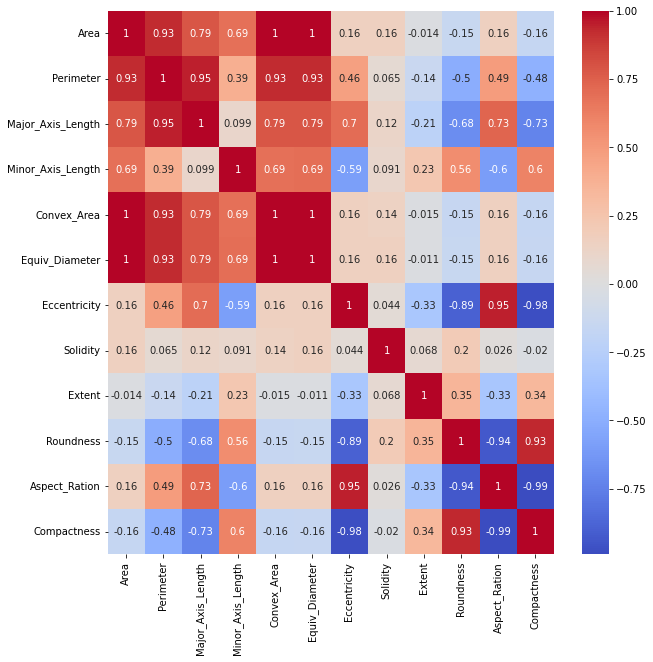

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', ax=ax)

#### Outliers

Outliers are values that are far away from the rest. Most of the time, outliers are a result of a mistake and can be safely removed without affecting the dataset. We can check for outliers by using a box plot. The box plot shows the minimum, maximum, median, first quartile and third quartile of the features. The outliers are the values that are outside the box plot.

In [11]:
def plot_outliers():
    # Create subplots (3x4) for each feature
    fig, ax = plt.subplots(3, 4, figsize=(20, 10))

    # Go through each feature and do a scatter and box plot
    for i in range(len(data.columns) - 1):
        # Get the axis for the current feature
        x = i // 4
        y = i % 4
        l = data.shape[0]
        # Scatter plot
        ax[x,y].scatter(range(l), data.iloc[:,i], alpha=0.3)
        # Box plot
        ax[x, y].boxplot(data.iloc[:,i], widths=l, positions=[l/2], autorange=True, sym='r.')
        # Set the title to the feature name
        ax[x, y].set_title(data.columns[i])

    plt.tight_layout()


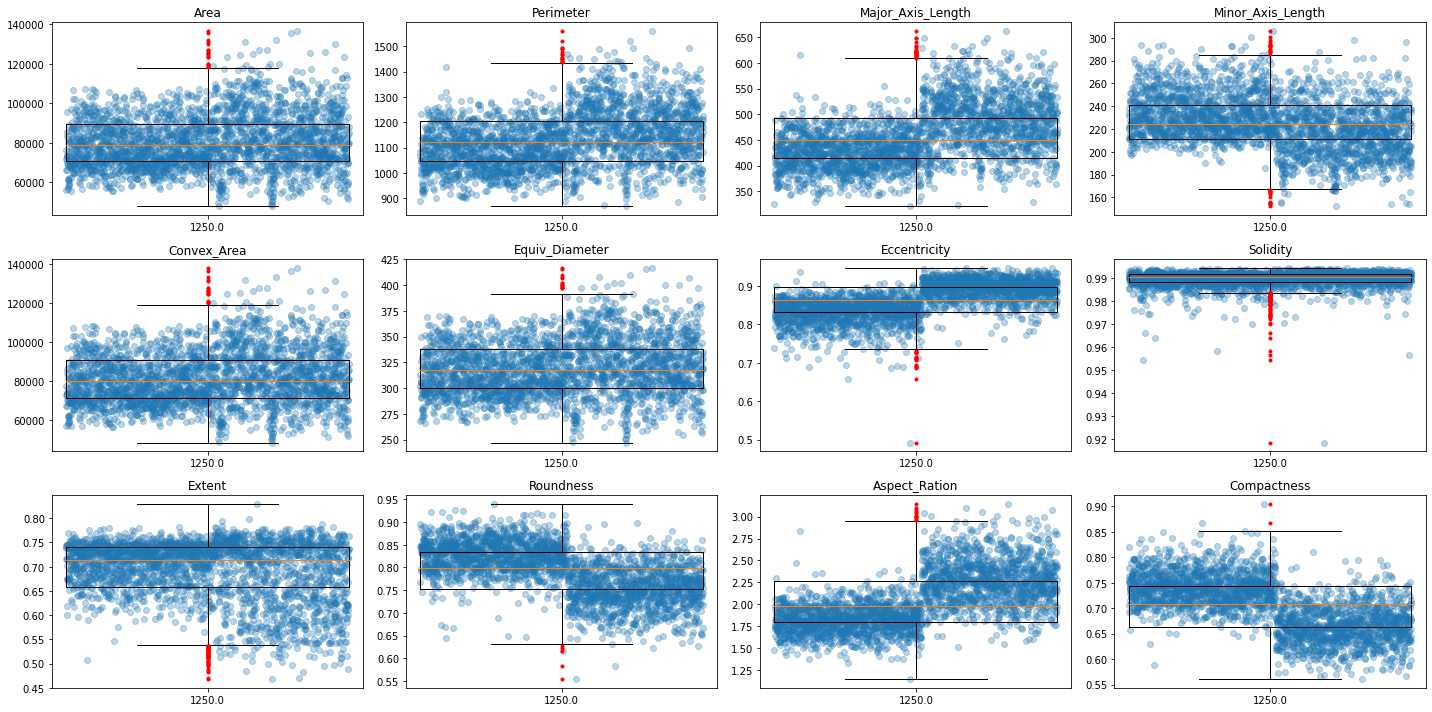

In [12]:
# Plot the outliers
plot_outliers()

#### Histogram

The histogram shows the distribution of values for a feature. The x-axis represents the values of the feature and the y-axis represents the number of samples that have that value. The histogram can be used to determine if the feature is normally distributed or not. If the feature is normally distributed, then the histogram will be a bell curve.

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'Major_Axis_Length'}>],
       [<AxesSubplot:title={'center':'Minor_Axis_Length'}>,
        <AxesSubplot:title={'center':'Convex_Area'}>,
        <AxesSubplot:title={'center':'Equiv_Diameter'}>],
       [<AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'Extent'}>],
       [<AxesSubplot:title={'center':'Roundness'}>,
        <AxesSubplot:title={'center':'Aspect_Ration'}>,
        <AxesSubplot:title={'center':'Compactness'}>]], dtype=object)

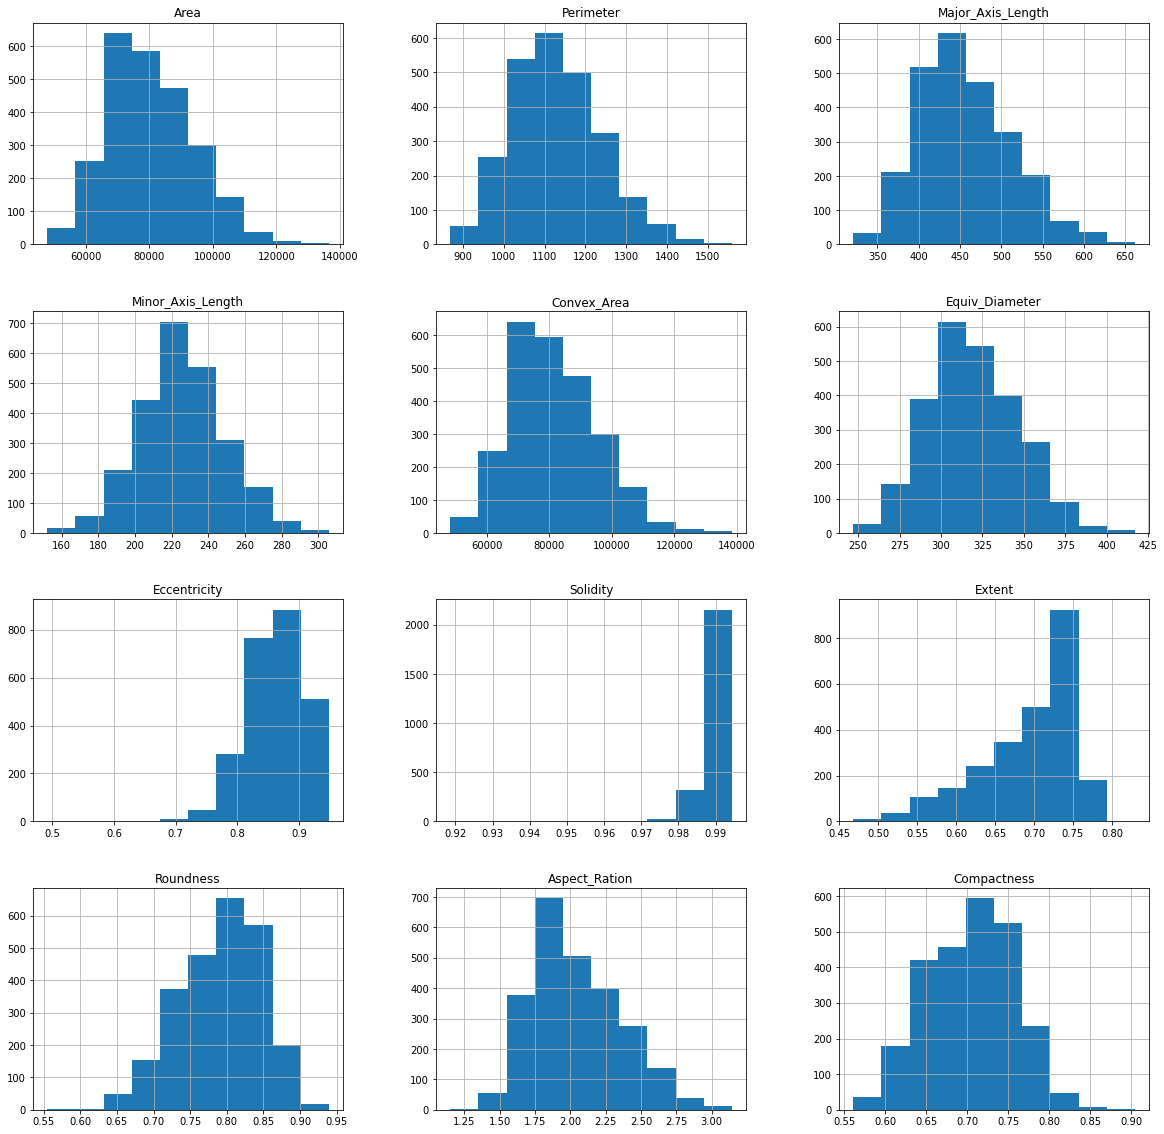

In [13]:
data.hist(figsize=(20, 20))

#### Class Imbalance

When training our model, we need to train it on a balanced dataset. If the dataset is not balanced, then we will have problems in predicting the minority classes. We can check if the dataset is balanced by plotting a pie chart of the target variable.

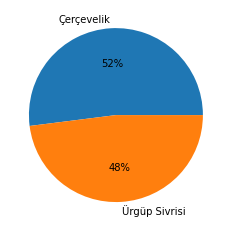

In [14]:
plt.rcParams['figure.facecolor'] = 'white'

plt.pie(data['Class'].value_counts(), labels=data['Class'].value_counts().index, autopct='%.0f%%')
plt.show()

### Preprocessing the dataset

When we are finished analyzing the dataset, we need to preprocess it. Preprocessing is a crucial step in machine learning where we remove null values and outliers, encode categorical features into numerical values and remap the values of the features to a range between 0 and 1.

#### Removing outliers

When removing outliers, we need to be careful. We need to remove outliers only if they are a result of a mistake. If the outliers are not a result of a mistake, then we need to keep them in the dataset.

To remove the outliers, we will use the Interquartile Range (IQR) method. The IQR method is a method that uses the first quartile (25%) and the third quartile (75%) to remove the outliers.

Any value that is less than the first quartile - 1.5 * IQR or greater than the third quartile + 1.5 * IQR will be discarded.

In [15]:
# Get 25th and 75th percentile for each feature
Q1 = data.quantile(0.25, numeric_only=True)
Q3 = data.quantile(0.75, numeric_only=True)

# Calculate IQR (Interquartile Range) for each feature
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

# Remove the rows that have outliers in any feature
data = data[~((data.lt(low)) | (data.gt(high))).any(axis=1)]

In [16]:
# Check the shape of the new data
data.shape

(2285, 13)

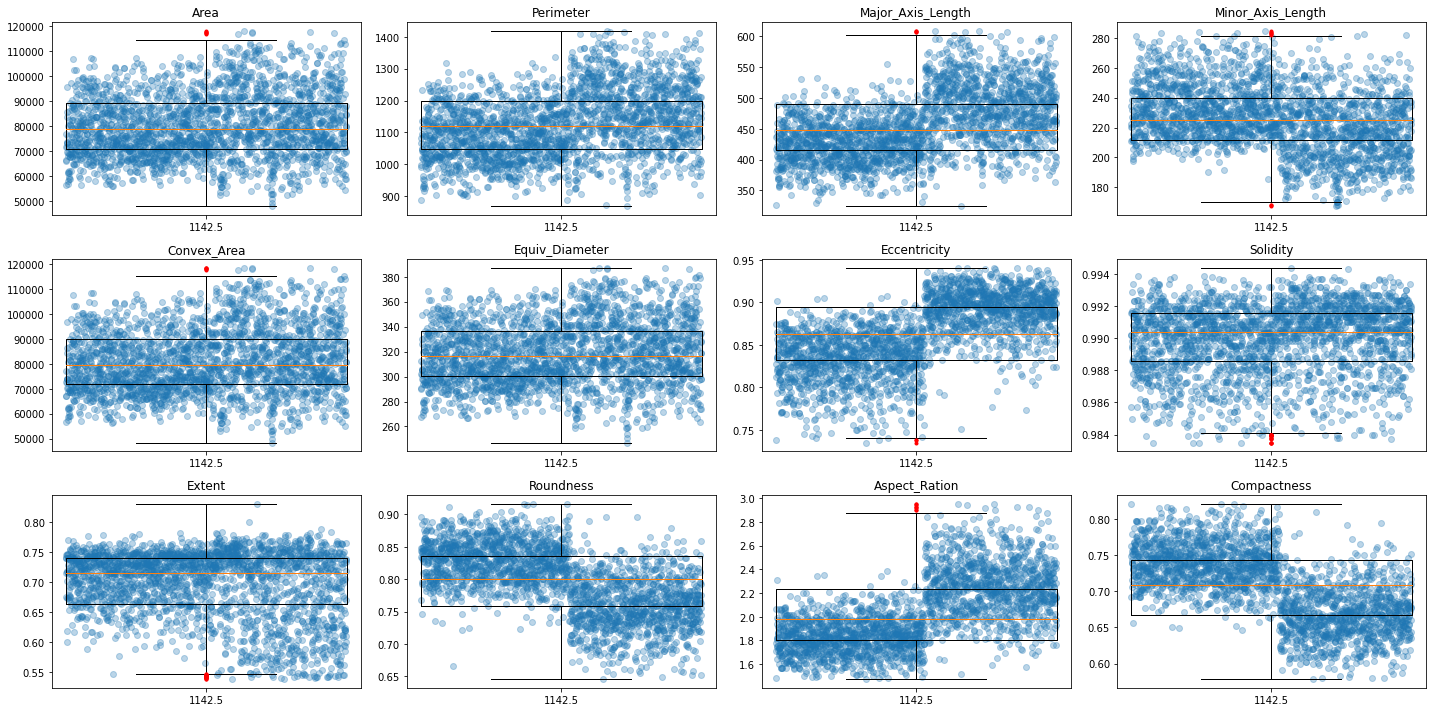

In [17]:
# Plot the data again to see if we removed the outliers
plot_outliers()

#### Normalizing the features

When training our model, we need to normalize the features. Normalization is a process where we remap the values of the features to a range between 0 and 1. This process will help the model to converge faster and it will also help the model to generalize better.

In [18]:
def normalize_column(column):
    # Get the minimum and maximum values for the column
    min_value = column.min()
    max_value = column.max()

    # Normalize the column
    column = (column - min_value) / (max_value - min_value)

    return column

# normalize the feature columns
for i in range(len(data.columns) - 1):
    data.iloc[:,i] = normalize_column(data.iloc[:,i])

# describe the data
data.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  2285.000000  2285.000000        2285.000000        2285.000000   
mean      0.463764     0.467560           0.458776           0.499431   
std       0.183226     0.187679           0.184889           0.185764   
min       0.000000     0.000000           0.000000           0.000000   
25%       0.329680     0.327740           0.320601           0.380352   
50%       0.442268     0.458114           0.438050           0.490943   
75%       0.587778     0.598794           0.583979           0.618696   
max       1.000000     1.000000           1.000000           1.000000   

       Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count  2285.000000     2285.000000   2285.000000  2285.000000  2285.000000   
mean      0.467056        0.511792      0.610570     0.591055     0.542843   
std       0.183811        0.180751      0.200892     0.198120     0.192182   
min       0.000000        0.000000      0.000000     0.000000     0.000000   
25%       0.332631        0.381874      0.472101     0.467890     0.427295   
50%       0.445924        0.497546      0.622513     0.633028     0.604331   
75%       0.592695        0.638798      0.774867     0.743119     0.693022   
max       1.000000        1.000000      1.000000     1.000000     1.000000   

         Roundness  Aspect_Ration  Compactness  
count  2285.000000    2285.000000  2285.000000  
mean      0.554440       0.375702     0.523306  
std       0.190774       0.198146     0.203925  
min       0.000000       0.000000     0.000000  
25%       0.417375       0.222561     0.365321  
50%       0.571165       0.342266     0.538715  
75%       0.702403       0.515767     0.678336  
max       1.000000       1.000000     1.000000

#### Encoding the target variable

The target variables are usually textual and we will need to encode them into numerical values for the model to be able to work with them properly. We can encode these values manually or we can use a label encoder to do it for us.

In [19]:
# Remap the class labels to numeric values

# Get the unique class labels
labels = data['Class'].unique()

# Create a list that maps class labels to numeric values
indexes = [i for i in range(len(labels))]

# Remap the class labels to numeric values
data['Class'].replace(labels, indexes, inplace=True)

# Print the new class labels
data['Class'].unique()

array([0, 1], dtype=int64)

## Machine Learning Model

After data preprocessing, we can start creating our machine learning model. First we will pair plot the features to see the correlation between them. Then we will split the dataset into training and testing sets. After that, we will train our model on the training set and test it on the testing set. We will use the accuracy score to evaluate our model.

#### Pair Plot

Pair plots are used to visualize how the features are correlated to each other. Here we can make a decision about which algorithm to use as our model. If the features can be separated by a straight line, then we can use a linear model. If the features are grouped together, we can use a clustering algorithm, etc.

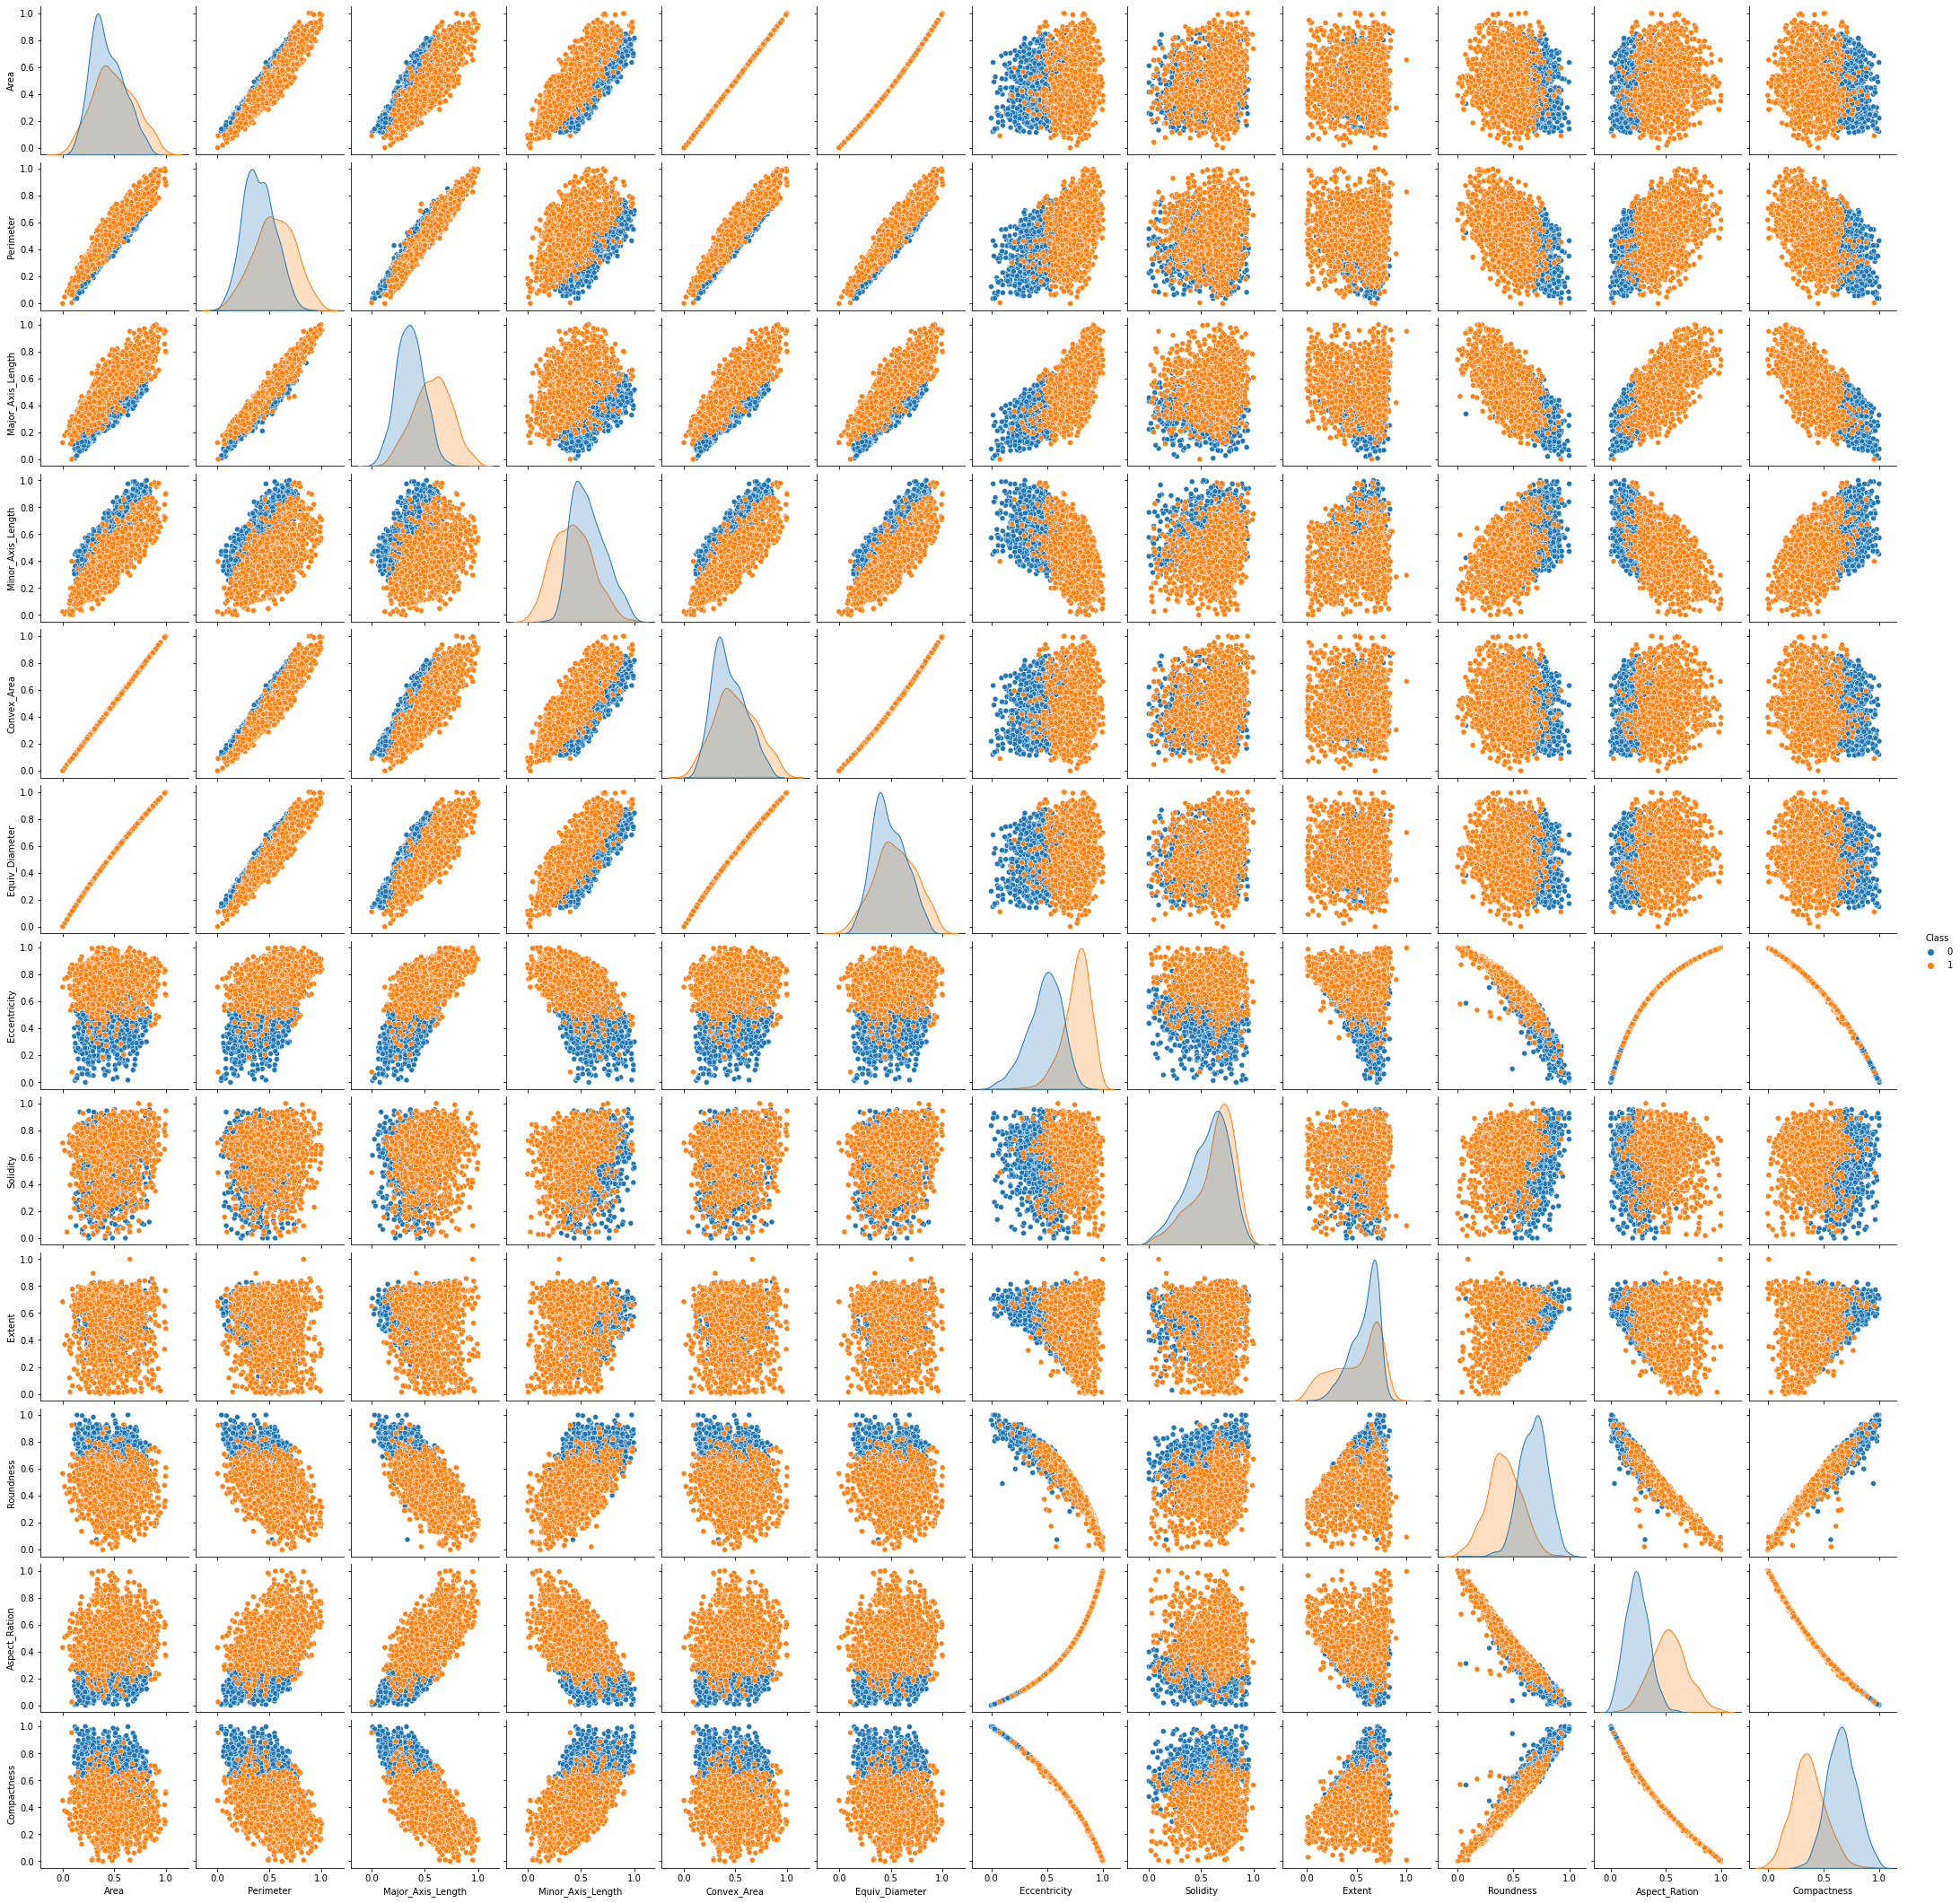

In [20]:
sns.pairplot(data, hue='Class')

#### Splitting into features and target

To train our model we need to split the dataset into features and target. Features are all the columns that are used as input for the model, The target is the column that we want to predict.

In [21]:
# Split the data into features and target

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

#### Splitting into training and testing sets

After splitting the dataset into features and targets, we will now further split these into training and testing sets. There are a lot of different ratios while the most common one is 80% for training and 20% for testing.

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Training the model

Selecting the best model for our dataset is a very important step. When selecting a model we need to take into account the features and their correlation. After selecting the model we need to tune the hyperparameters of the model to get the best results.

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning

# Create a dictionary of parameters
params = {
    'solver': ['svd','lsqr', 'eigen'],
    'shrinkage': ['auto', None, 0.2, 0.4, 0.6, 0.8, 1.0],
    'n_components': [None],
    'priors': [None, [0.7, 0.3], [0.6, 0.4], [0.5, 0.5], [0.4, 0.6], [0.3, 0.7]]
}

# Create a grid search object with the parameters and the classifier
grid = GridSearchCV(LinearDiscriminantAnalysis(), params, cv=5, scoring='accuracy', n_jobs=-1)

# Hack to suppress the FitFailedWarning and UserWarning messages generated by GridSearchCV
# when fitting the model with some combination of the parameters
import warnings
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Train the classifier
grid.fit(x_train, y_train)

# Reset warning filters
warnings.resetwarnings()

# Print the best score parameters

print(f'Best parameters: {grid.best_params_} with score: {grid.best_score_}')

# Convert the results to a dataframe
results = pd.DataFrame(grid.cv_results_)


Best parameters: {'n_components': None, 'priors': [0.4, 0.6], 'shrinkage': None, 'solver': 'svd'} with score: 0.8840182648401826


In [24]:
# Drop unnecessary columns
results.drop('params', axis=1, inplace=True)
# Print the top 10 results
results.sort_values(by='rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
87       0.028989      0.007067         0.006208        0.001831   
66       0.038201      0.013994         0.006400        0.003880   
65       0.023400      0.006890         0.004204        0.000751   
64       0.017796      0.003310         0.006193        0.002982   
3        0.015598      0.003268         0.004998        0.002091   
4        0.014796      0.001600         0.003600        0.000493   
5        0.017008      0.005625         0.008196        0.003766   
68       0.015403      0.003773         0.004196        0.001462   
67       0.012618      0.002862         0.003184        0.000398   
88       0.024791      0.011988         0.007798        0.004620   

   param_n_components param_priors param_shrinkage param_solver  \
87               None   [0.4, 0.6]            None          svd   
66               None   [0.5, 0.5]            None          svd   
65               None   [0.5, 0.5]            auto        eigen   
64               None   [0.5, 0.5]            auto         lsqr   
3                None         None            None          svd   
4                None         None            None         lsqr   
5                None         None            None        eigen   
68               None   [0.5, 0.5]            None        eigen   
67               None   [0.5, 0.5]            None         lsqr   
88               None   [0.4, 0.6]            None         lsqr   

    split0_test_score  split1_test_score  split2_test_score  \
87           0.882514           0.882514           0.901639   
66           0.885246           0.887978           0.885246   
65           0.879781           0.879781           0.887978   
64           0.879781           0.879781           0.887978   
3            0.885246           0.882514           0.882514   
4            0.885246           0.882514           0.882514   
5            0.885246           0.882514           0.882514   
68           0.879781           0.885246           0.887978   
67           0.879781           0.885246           0.887978   
88           0.882514           0.871585           0.893443   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
87           0.882192           0.871233         0.884018        0.009817   
66           0.879452           0.868493         0.881283        0.006974   
65           0.890411           0.863014         0.880193        0.009597   
64           0.890411           0.863014         0.880193        0.009597   
3            0.879452           0.871233         0.880192        0.004840   
4            0.879452           0.871233         0.880192        0.004840   
5            0.879452           0.871233         0.880192        0.004840   
68           0.879452           0.868493         0.880190        0.006689   
67           0.879452           0.868493         0.880190        0.006689   
88           0.868493           0.873973         0.878001        0.009018   

    rank_test_score  
87                1  
66                2  
65                3  
64                3  
3                 5  
4                 5  
5                 5  
68                8  
67                8  
88               10

#### Confusion Matrix

The confusion matrix is used to evaluate the performance of the model. The confusion matrix shows the number of true positives, true negatives, false positives and false negatives.

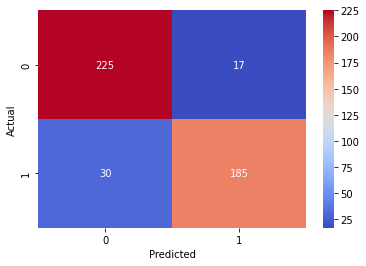

In [25]:
from sklearn.metrics import confusion_matrix

# Predict the class labels for the test data
y_pred = grid.predict(x_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Accuracy Score

The accuracy score is a metric that is used to evaluate the performance of the model. The accuracy score is calculated by dividing the number of correct predictions by the total number of predictions.

In [26]:
accuracy = (y_pred == y_test).sum() / len(y_test)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8971553610503282
